Visualization (a posteriori)

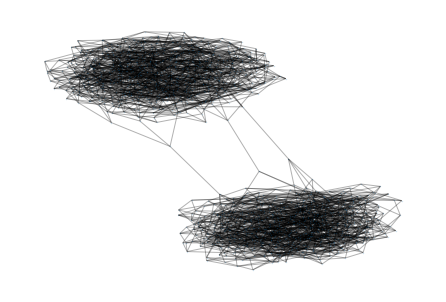

In [33]:
import networkx as nx

G = nx.Graph(graph)
nx.draw(G, node_size=.1, linewidths=1, alpha=.3)#, with_labels=True)

In [34]:
import random
with open("input25.txt", "r") as f:
    data = f.read().replace(":","").split("\n")
data = [l.split() for l in data]

def graph_maker(data):
    graph = {comp:set() for line in data for comp in line}
    for line in data:
        for comp in line[1:]:
            graph[line[0]].add(comp)
            graph[comp].add(line[0])
    return graph
def contract_2(graph):#contract to 2, randomly, returns just the groups
    from copy import deepcopy
    graph = deepcopy(graph)
    while len(graph)>2:
        v1 = random.choice(list(graph.keys()))
        v2 = random.choice(list(graph[v1]))
        graph.update({v1+v2: graph[v1].union(graph[v2])-{v1,v2}})
        del graph[v1], graph[v2]
        for v in graph[v1+v2]:
            graph[v].discard(v1)
            graph[v].discard(v2)
            graph[v].add(v1+v2)
    return list(graph.keys())
def Kargers(graph, cut_size=3):#Karger's algorithm
    ct = cut_size + 1 
    while ct!=cut_size:
        reduced = contract_2(graph)
        groups = [[reduced[i][j:j+3] for j in range(0,len(reduced[i]),3)] for i in range(2)]
        ct = 0
        for v0 in groups[0]:
            for v1 in groups[1]:
                ct = ct + (1 if v1 in graph[v0] else 0)
    return groups

graph = graph_maker(data)
groups = Kargers(graph)
len(groups[0])*len(groups[1]), len(groups[0]), len(groups[1])

(525264, 744, 706)

In [6]:
#Karger-Stein is interesting, but requires multigraph (multiple edges between same vertices). 
#Done without multigraphs, but not super fast. Factor of 1/2 very useful. Timestamps indicate the method to count edges is not to blame (but doesn't say who is, though)

import math, random

with open("input25.txt", "r") as f:
    data = f.read().replace(":","").split("\n")
data = [l.split() for l in data]

def graph_maker(data):
    graph = {comp:set() for line in data for comp in line}
    for line in data:
        for comp in line[1:]:
            graph[line[0]].add(comp)
            graph[comp].add(line[0])
    return graph
def contract(graph, k):#contract to k, randomly, returns the graph
    from copy import deepcopy
    graph = deepcopy(graph)
    while len(graph)>k:
        v1 = random.choice(list(graph.keys()))
        v2 = random.choice(list(graph[v1]))
        graph.update({v1+v2: graph[v1].union(graph[v2])-{v1}-{v2}})
        del graph[v1], graph[v2]
        for v in graph[v1+v2]:
            graph[v].discard(v1)
            graph[v].discard(v2)
            graph[v].add(v1+v2)
    return graph
def bisect_cut(curr_graph):
    global graph
    if len(curr_graph) <=6:
        return contract(curr_graph, 2)
    k = math.ceil( 1+len(curr_graph)/2 )
    gr1, gr2 = bisect_cut(contract(curr_graph, k)), bisect_cut(contract(curr_graph, k))
    groups1 = [[list(gr1.keys())[i][j:j+3] for j in range(0,len(list(gr1.keys())[i]),3)] for i in range(2)]
    ct1, ct2 = 0, 0
    for v0 in groups1[0]:
        for v1 in groups1[1]:
            ct1 = ct1 + (1 if v1 in graph[v0] else 0)     
    groups2 = [[list(gr2.keys())[i][j:j+3] for j in range(0,len(list(gr2.keys())[i]),3)] for i in range(2)]
    for v0 in groups2[0]:
        for v1 in groups2[1]:
            ct2 = ct2 + (1 if v1 in graph[v0] else 0)
    if ct1<ct2:
        return gr1
    return gr2
def KargerStein(graph):
    ct = 4
    while ct!=3:
        reduced = bisect_cut(graph)
        groups = [[list(reduced.keys())[i][j:j+3] for j in range(0,len(list(reduced.keys())[i]),3)] for i in range(2)]
        ct = 0
        for v0 in groups[0]:
            for v1 in groups[1]:
                ct = ct + (1 if v1 in graph[v0] else 0)

    return math.prod([len(subset) for subset in groups])

graph = graph_maker(data)
KargerStein(graph)

525264

In [36]:
#Karger-Stein is interesting, but requires multigraph (multiple edges between same vertices). 
#Sort of simulated with lists.

import math, random

with open("input25.txt", "r") as f:
    data = f.read().replace(":","").split("\n")
data = [l.split() for l in data]

def graph_maker_l(data):#list-based graph
    graph = {comp:[] for line in data for comp in line}
    for line in data:
        for comp in line[1:]:
            graph[line[0]].append(comp)
            graph[comp].append(line[0])
    return graph
def contract(graph, k):#contract to k, randomly, returns graph
    from copy import deepcopy
    graph = deepcopy(graph)
    while len(graph)>k:
        v1 = random.choice(list(graph.keys()))
        v2 = random.choice(list(graph[v1]))
        graph.update({v1+v2: ([v for v in graph[v1]+graph[v2] if v not in {v1,v2}])}) #sorted list?
        for v in graph[v1]:
            graph[v].remove(v1)
            if v != v2:
                graph[v].append(v1+v2)
        for v in graph[v2]:
            graph[v].remove(v2)
            if v != v1:
                graph[v].append(v1+v2)
        del graph[v1], graph[v2]
    return graph
# i = 0
def bisect_cut(graph):
    # global i
    # i+=1
    # print("\rCalls to bisect_cut function: "+str(i), end="")
    if len(graph) <=6:
        return contract(graph, 2)
    k = math.ceil( 1+len(graph)/2 )
    gr1, gr2 = bisect_cut(contract(graph, k)), bisect_cut(contract(graph, k))
    cutsize1, cutsize2 = len(list(gr1.values())[0]), len(list(gr2.values())[0])
    if cutsize1<cutsize2:
        return gr1
    return gr2
def KargerStein_l(graph):
    reduced = bisect_cut(graph)
    while len(list(reduced.values())[0]) !=3:
        reduced = bisect_cut(graph)
        # print("------------", end="")
    return math.prod([int(len(v)/3) for v in reduced])

graph = graph_maker_l(data)
KargerStein_l(graph)

525264

In [77]:
#bad ideas

def fully_conn(graph):
    init = random.choice(list(graph.keys()))
    queue, visited = {init}, {init}
    while queue != set():
        current = queue.pop()
        neighbors = graph[current]
        queue.update(neighbors-visited)
        visited.update(neighbors)
    if len(visited) == len(graph):
        return True
    else:
        return False  
def size_conn(graph):
    from collections import deque
    init = random.choice(list(graph.keys()))
    queue, visited = deque([init]), {init}
    while queue != deque([]):
        current = queue.pop()
        neighbors = graph[current]
        queue.extendleft((neighbors-visited))
        visited.update(neighbors)
    #one could try if it's fully connected, then count the other graph, but we only need the size of one group
    return len(visited)
def cut(graph, disconnected):
    from copy import deepcopy
    graph = deepcopy(graph)
    for comp1, comp2 in disconnected:
        graph[comp1].remove(comp2)
        graph[comp2].remove(comp1)
    return graph
#brute force random cut of three
def cut3rand(graph):
    from copy import deepcopy
    #disconnected = []
    graph = deepcopy(graph)
    for _ in range(3):
        comp1 = random.choice(list(graph.keys()))
        comp2 = random.choice(list(graph[comp1]))
        graph[comp1].remove(comp2)
        graph[comp2].remove(comp1)
        #disconnected.append({comp1,comp2})
    return graph#, disconnected
#brute force non-random
def brute_force(graph):
    pair_list = []
    for comp1 in graph:
        for comp2 in graph[comp1]:
            pair_list.append((comp1, comp2)) if (comp2,comp1) not in pair_list else None

    total = len(graph)
    for i in range(len(pair_list)):
        for j in range(i+1, len(pair_list)):
            for k in range(j+1, len(pair_list)):
                disconnected = [pair_list[i], pair_list[j], pair_list[k]]
                cutgraph = cut(graph, disconnected)
                size = size_conn(cutgraph)
                if size<total:
                    return size
    return size#, disconnected

def brute_force2(graph):
    pair_list = []
    for comp1 in graph:
        for comp2 in graph[comp1]:
            pair_list.append((comp1, comp2)) if (comp2,comp1) not in pair_list else None
    total = len(graph)

    for i in range(len(pair_list)):
        cutgraph1 = cut(graph, [pair_list[i]])
        for j in range(i+1, len(pair_list)):
            cutgraph2 = cut(cutgraph1, [pair_list[j]])
            for k in range(j+1, len(pair_list)):
                cutgraph3 = cut(cutgraph2, [pair_list[k]])
                size = size_conn(cutgraph3)
                if size<total:
                    return size#, [pair_list[i], pair_list[j], pair_list[k]]
    return 0